<a href="https://colab.research.google.com/github/Aryanth003/ml_with_fflask/blob/main/recomedation_system_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

import seaborn as sns

In [66]:
# User Based Collabrative Filtering
# -Finds user With similar preference and recomendations items like by those users.
df[3:4]['movie']

,movie
3,Toy Story (1995)


In [49]:
df=pd.read_csv('/content/Movie.csv')
df


,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [ ]:
df[df['movie']=='GoldenEye (1995)'].rating.mean()

3.4270025839793283

In [ ]:
df['rating'].fillna(0,inplace=True)

<ipython-input-40-4e7c0b498416>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['movie'].fillna(0,inplace=True)


In [ ]:
df['movie'].isnull().sum()

0

In [56]:
usersim = 1 - pairwise_distances(df['movie'].values, metric='cosine')

ValueError: could not convert string to float: 'Toy Story (1995)'

In [ ]:
df2=pd.read_csv('/content/Wholesale customers data.csv')
df2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
df2.drop(['Channel','Region'],axis=1,inplace=True)

In [ ]:
array=df2.values

In [ ]:
stscaler=StandardScaler().fit(array)
x=stscaler.transform(df2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
db=DBSCAN(eps=0.8,min_samples=6)
db.fit(df2)

DBSCAN(eps=0.8, min_samples=6)

In [ ]:
cl=pd.DataFrame(db.labels_,columns=['cluster'])
pd.concat([df2,cl],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,-1
1,7057,9810,9568,1762,3293,1776,-1
2,6353,8808,7684,2405,3516,7844,-1
3,13265,1196,4221,6404,507,1788,-1
4,22615,5410,7198,3915,1777,5185,-1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,-1
436,39228,1431,764,4510,93,2346,-1
437,14531,15488,30243,437,14841,1867,-1
438,10290,1981,2232,1038,168,2125,-1


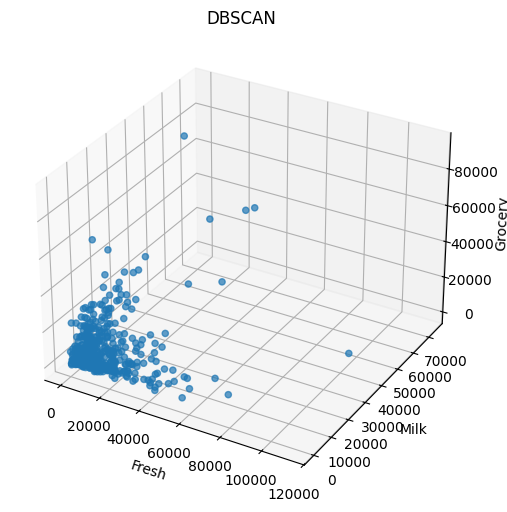

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
# Access the cluster labels from the 'cl' DataFrame instead of the 'db' object
ax.scatter(df2['Fresh'],df2['Milk'],df2['Grocery'],c=cl['cluster'],cmap='tab10',alpha=0.7)
ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')
ax.title.set_text('DBSCAN')
plt.show()

In [ ]:
df3

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87
